In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Datan lähteet

Väestön alustava sukupuoli ja ikäjakauma on generoitu seuraavan tilastokeskuksen tilaston perusteella:\
StatFin / Väestö / Väestörakenne / 11rd -- Väestö iän (1-v. 0-112) ja sukupuolen mukaan, 1972-2020 \
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__vaerak/statfin_vaerak_pxt_11rd.px/chart/chartViewColumn/
ko. tilastosta on käytetty vuotta 2020

Eliniän simuloinnissa on käytetty seuraavaa tilastokeskuksen tilastoa:\
StatFin / Väestö / Kuolleet / 12ag -- Kuolleet iän (1-v.) ja sukupuolen mukaan, 1980-2020
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__kuol/statfin_kuol_pxt_12ag.px/chart/chartViewColumn/ \
ko. tilastosta on käytetty vuotta 2020

Syntyvyyden simuloinnissa on käytetty seuraavaa tilastokeskuksen tilastoa:\
/ StatFin / Väestö / Syntyneet / 12dm -- Elävänä syntyneet sukupuolen, järjestysluvun ja äidin iän (1-v.) mukaan, 1990-2020 \
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__synt/statfin_synt_pxt_12dm.px/table/tableViewLayout1/ \
ko. tilastosta on käytetty vuotta 2020

In [55]:
population_stats_df = pd.read_csv(os.path.join(os.pardir, 'data', '004_11rd_2020_20220319-004320.csv'), encoding='iso-8859-1', skiprows=2, delimiter=";")
def tilastokeskus_transform_dataframe(df):
    df['sex'] = df['Sukupuoli'].apply(lambda x: 1 if x == 'Miehet' else 0)
    df.rename(columns={'2020': 'population_count', 'Ikä': 'age'}, inplace=True)
    df.drop(df.columns.difference(['sex', 'population_count', 'age']), 1, inplace=True)
    return df
tilastokeskus_transform_dataframe(population_stats_df)

,age,population_count,sex
0,0,23806,1
1,1,23459,1
2,2,25012,1
3,3,26298,1
4,4,27634,1
...,...,...,...
221,108,5,0
222,109,0,0
223,110,0,0
224,111,0,0


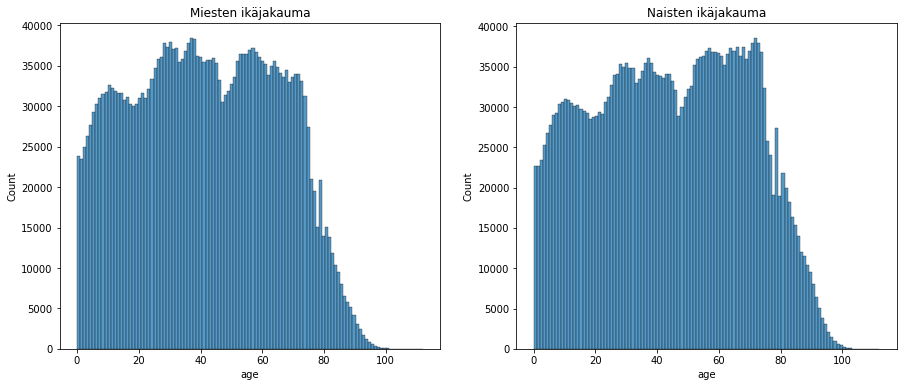

In [56]:
def plot_population_age_distributions_by_sex(df):
    a4_dims = (15, 6)
    fig, ax = plt.subplots(1, 2, figsize=a4_dims)
    males = df[df['sex'] == 1]
    females = df[df['sex'] == 0]
    mp = sns.histplot(data=males, x=males['age'], weights=males['population_count'], bins=len(males['age']), ax=ax[0])
    mp.set_title("Miesten ikäjakauma")
    fp = sns.histplot(data=females, x=females['age'], weights=females['population_count'], bins=len(females['age']), ax=ax[1])
    fp.set_title("Naisten ikäjakauma")
    fig.show()
plot_population_age_distributions_by_sex(population_stats_df)

In [112]:
INITIAL_POPULATION_SIZE = population_stats_df['population_count'].sum()
ages = np.zeros(INITIAL_POPULATION_SIZE, dtype=int)
sexes = np.zeros(INITIAL_POPULATION_SIZE, dtype=int)

start_idx = 0
for _, row in population_stats_df.iterrows():
    end_idx = start_idx + row['population_count']
    ages[start_idx:end_idx] = np.repeat(row['age'], row['population_count'])
    sexes[start_idx:end_idx] = np.repeat(row['sex'], row['population_count'])
    start_idx = end_idx

population_df = pd.DataFrame({'age': ages, 'sex': sexes})